In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [3]:
df.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type Crime Solved Victim Sex  \
0  1980  January         1  Murder or Manslaughter          Yes       Male   
1  1980    March         1  Murder or Manslaughter          Yes       Male   
2  1980    March         2  Murder or Manslaughter           No     Female   
3  1980    April         1  Murder or Manslaughter          Yes       Male   
4  1980    April         2  Murder or Manslaughter           No     Female   

   Victim Age                    Victim Race Perpetrator Sex Perpetrator Age  \
0          14  Native American/Alaska Native            Male              15   
1          43                          White            Male              42   
2          30  Native American/Alaska Native         Unknown               0   
3          43                          White            Male              42   
4          30  Native American/Alaska Native         Unknown               0   

                Perpetrator Race  Relationship         Weapon Record Source  
0  Native American/Alaska Native  Acquaintance   Blunt Object           FBI  
1                          White  Acquaintance  Strangulation           FBI  
2                        Unknown       Unknown        Unknown           FBI  
3                          White  Acquaintance  Strangulation           FBI  
4                        Unknown       Unknown        Unknown           FBI

## Treating data

For The initial treating of this dataset, there are things needed to be done:

1) Check data types;

2) Drop columns that will not be used;

3) Handle missing values;

4) Handle Outliers;

## Checking data types

The data type of perpetrator's age was not seen as int initially, so there was the need to treat those values and transform them to NaN (there is only one row with an NA value in 'Perpetrator Age').

In [4]:
df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age     object
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

In [5]:
# This code coerce the errors to become NaN
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')

# The we drop those values
df = df.dropna(subset=['Perpetrator Age'])

# So we can transform it to type int64
df['Perpetrator Age'] = df['Perpetrator Age'].astype('int64')

df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age      int64
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

## Dropping columns

In [6]:
drop_columns = ['Agency Code', 'Record Source', 'Agency Type', 'Agency Name']
df = df.drop(columns = drop_columns)

In [7]:
df

Record ID        City    State  Year      Month  Incident  \
0               1   Anchorage   Alaska  1980    January         1   
1               2   Anchorage   Alaska  1980      March         1   
2               3   Anchorage   Alaska  1980      March         2   
3               4   Anchorage   Alaska  1980      April         1   
4               5   Anchorage   Alaska  1980      April         2   
...           ...         ...      ...   ...        ...       ...   
638449     638450        Park  Wyoming  2014    January         1   
638450     638451    Sheridan  Wyoming  2014       June         1   
638451     638452    Sheridan  Wyoming  2014  September         1   
638452     638453    Sublette  Wyoming  2014   December         1   
638453     638454  Sweetwater  Wyoming  2014  September         1   

                    Crime Type Crime Solved Victim Sex  Victim Age  \
0       Murder or Manslaughter          Yes       Male          14   
1       Murder or Manslaughter          Yes       Male          43   
2       Murder or Manslaughter           No     Female          30   
3       Murder or Manslaughter          Yes       Male          43   
4       Murder or Manslaughter           No     Female          30   
...                        ...          ...        ...         ...   
638449  Murder or Manslaughter           No       Male          30   
638450  Murder or Manslaughter          Yes       Male          62   
638451  Murder or Manslaughter          Yes     Female           0   
638452  Murder or Manslaughter          Yes       Male          55   
638453  Murder or Manslaughter          Yes     Female           0   

                          Victim Race Perpetrator Sex  Perpetrator Age  \
0       Native American/Alaska Native            Male               15   
1                               White            Male               42   
2       Native American/Alaska Native         Unknown                0   
3                               White            Male               42   
4       Native American/Alaska Native         Unknown                0   
...                               ...             ...              ...   
638449                          White         Unknown                0   
638450                          White            Male               57   
638451         Asian/Pacific Islander          Female               22   
638452                          White            Male               31   
638453                          White          Female               24   

                     Perpetrator Race  Relationship         Weapon  
0       Native American/Alaska Native  Acquaintance   Blunt Object  
1                               White  Acquaintance  Strangulation  
2                             Unknown       Unknown        Unknown  
3                               White  Acquaintance  Strangulation  
4                             Unknown       Unknown        Unknown  
...                               ...           ...            ...  
638449                        Unknown       Unknown        Handgun  
638450                          White  Acquaintance        Handgun  
638451         Asian/Pacific Islander      Daughter    Suffocation  
638452                          White      Stranger          Knife  
638453                          White      Daughter   Blunt Object  

[638453 rows x 16 columns]

## Handling Missing Values/ Outliers

In this dataset many values were Unknown, or just had very weird number patterns so I will get rid of theses rows.

First we drop the Unknown values, that are usually related to crimes that were not solved and there is no knowledge about the Perpetrator's sex/Age, Weapon used etc. So those values will be dropped so we can work with a more precise information.

In [8]:
df.drop(df[(df == 'Unknown').any(axis=1)].index, inplace=True)

To handle outliers we can use some plots to first identify them, and then do something about it.

I will use Histograms for the numerical data.

(The print below is represents the values of data before treatment)

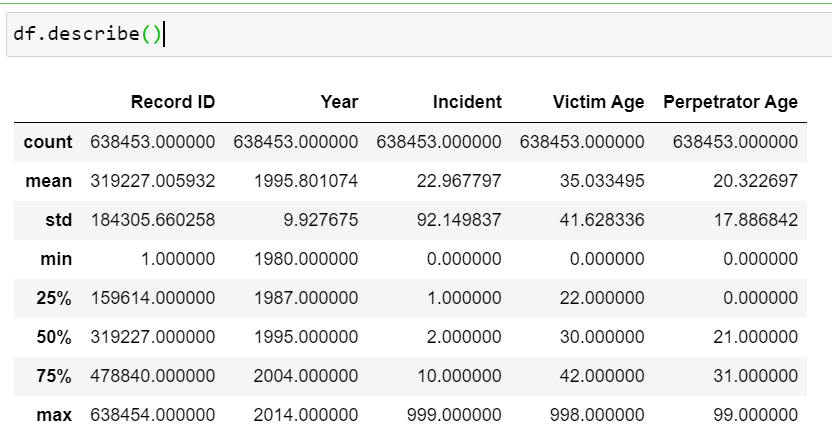

## Victim Age

For this column there were multiple values set to 998 before the dropping of the 'Unknown values' but after the inicial treatment this number dropped to 71. 

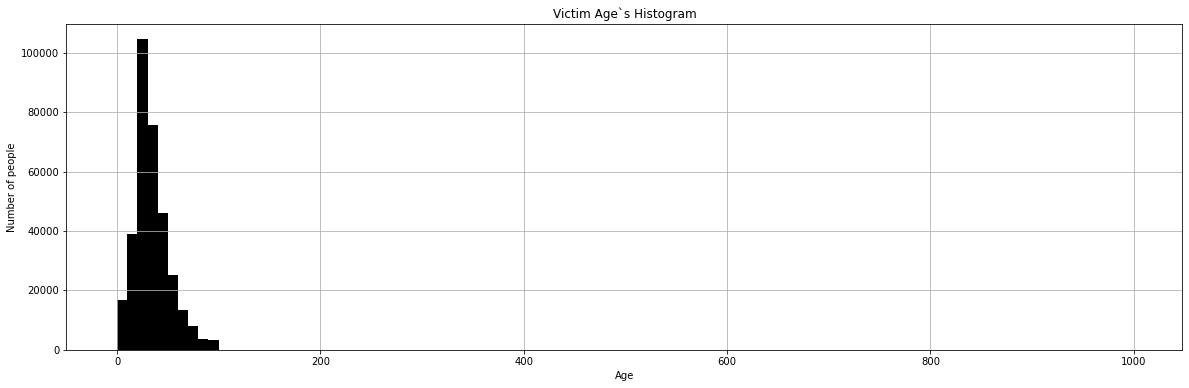

In [9]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

In [10]:
above_100 = (df['Victim Age'] == 998).sum()
above_100

71

For 'Victim Age' we can see that there are some entries in the 1000 years range (there are 71 values equals to 998 years old). To handle those, we would first replace these values with NA, and then transform those in a value according to the median.

In [11]:
df['Victim Age'] = df['Victim Age'].replace(998, pd.NA)
victim_age_median = df['Victim Age'].median()
df['Victim Age'].fillna(victim_age_median, inplace=True)
df['Victim Age'] = df['Victim Age'].astype('int64')

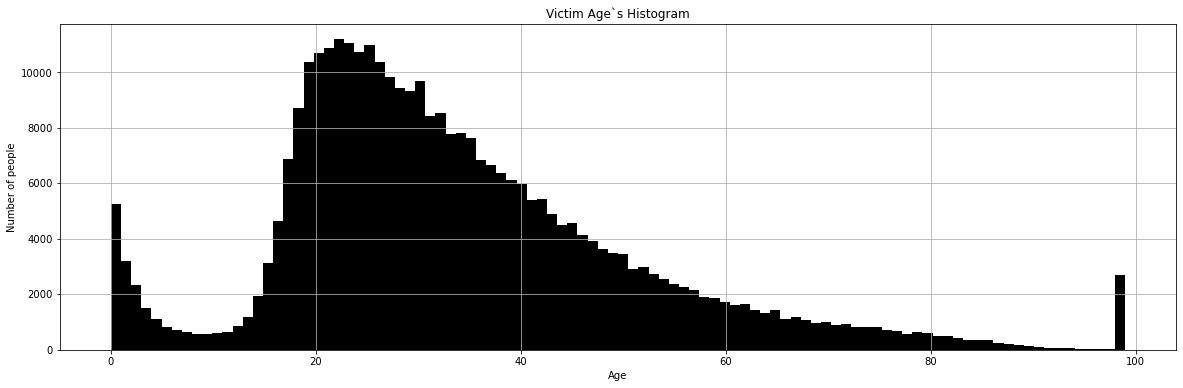

In [12]:
# New plot, without the 998 values
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

To deal with this outlier I used a method to handle missing data - Replacing the weird values with Random Values. I treated this as missing data because in no way there were so many 99 years old victims. There were simply too little 90-98 year olds dying from homicides to see this as proper data. So below I assign random values for the 99 yo victims.

In [13]:
v_non_99_values = df[df['Victim Age'] != 99]['Victim Age']
v_random_sample = np.random.choice(v_non_99_values, df['Victim Age'].eq(99).sum())
df.loc[df['Victim Age'] == 99, 'Victim Age'] = v_random_sample

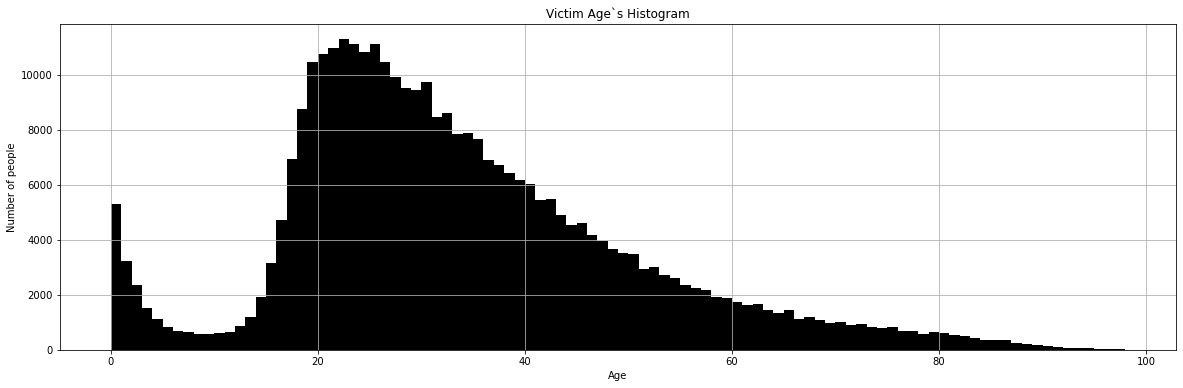

In [14]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=98, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

Also there is an unusual concentration of 99 years old victims in this graph, which makes me question how legit this data can be when so many are just outliering. But when I treat this data another anomally happens: The Median Age suffers a spike.

## Perpetrator Age

Here the problem is: there are many perpetrators (> 10k) that are said to be 0 years old, which is highly unlikely. So we will need to neutralise this spike. 

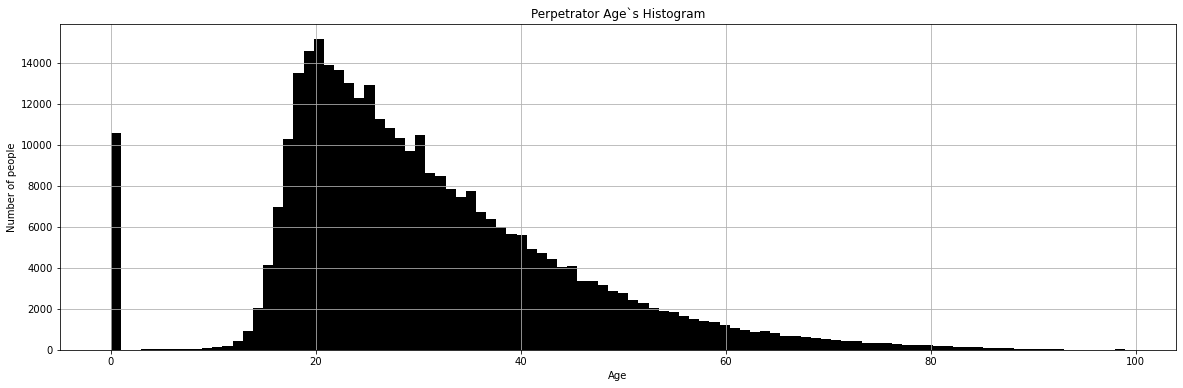

In [15]:
plt.figure(figsize=(20,6))
plt.hist(df['Perpetrator Age'], bins=100, color= 'black')
plt.title('Perpetrator Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

When it comes to 'Perpetrator's Age' we have many values being 0, representing the Age is unknown. I will deal with this the same way I dealt with the problem we had with Victim Ages being excessive on the 99 value. We will input random numbers.

Here all the crimes were solved, we have the information of the weapon used and the Victim data, its just the values of the Perpetrator's Age that were set to 0. So Randomise is a good option for handling this data.

In [16]:
p_non_0_values = df[df['Perpetrator Age'] != 0]['Perpetrator Age']
p_random_sample = np.random.choice(p_non_0_values, df['Perpetrator Age'].eq(0).sum())
df.loc[df['Perpetrator Age'] == 0, 'Perpetrator Age'] = p_random_sample

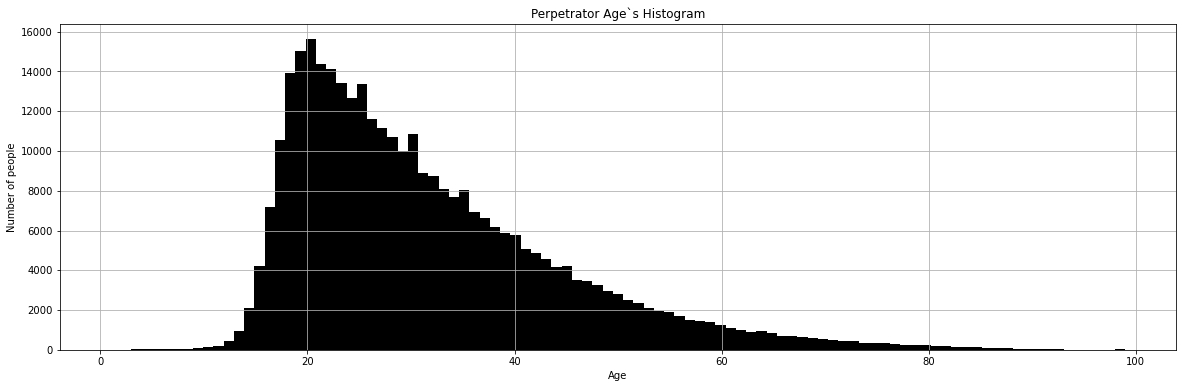

In [17]:
plt.figure(figsize=(20,6))
plt.hist(df['Perpetrator Age'], bins=99, color= 'black')
plt.title('Perpetrator Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

In [18]:
df.reset_index(inplace=True)
df

index  Record ID        City    State  Year      Month  Incident  \
0            0          1   Anchorage   Alaska  1980    January         1   
1            1          2   Anchorage   Alaska  1980      March         1   
2            3          4   Anchorage   Alaska  1980      April         1   
3            5          6   Anchorage   Alaska  1980        May         1   
4            6          7   Anchorage   Alaska  1980        May         2   
...        ...        ...         ...      ...   ...        ...       ...   
335613  638448     638449     Natrona  Wyoming  2014     August         1   
335614  638450     638451    Sheridan  Wyoming  2014       June         1   
335615  638451     638452    Sheridan  Wyoming  2014  September         1   
335616  638452     638453    Sublette  Wyoming  2014   December         1   
335617  638453     638454  Sweetwater  Wyoming  2014  September         1   

                    Crime Type Crime Solved Victim Sex  Victim Age  \
0       Murder or Manslaughter          Yes       Male          14   
1       Murder or Manslaughter          Yes       Male          43   
2       Murder or Manslaughter          Yes       Male          43   
3       Murder or Manslaughter          Yes       Male          30   
4       Murder or Manslaughter          Yes     Female          42   
...                        ...          ...        ...         ...   
335613  Murder or Manslaughter          Yes       Male          29   
335614  Murder or Manslaughter          Yes       Male          62   
335615  Murder or Manslaughter          Yes     Female           0   
335616  Murder or Manslaughter          Yes       Male          55   
335617  Murder or Manslaughter          Yes     Female           0   

                          Victim Race Perpetrator Sex  Perpetrator Age  \
0       Native American/Alaska Native            Male               15   
1                               White            Male               42   
2                               White            Male               42   
3                               White            Male               36   
4       Native American/Alaska Native            Male               27   
...                               ...             ...              ...   
335613  Native American/Alaska Native            Male               67   
335614                          White            Male               57   
335615         Asian/Pacific Islander          Female               22   
335616                          White            Male               31   
335617                          White          Female               24   

                     Perpetrator Race  Relationship         Weapon  
0       Native American/Alaska Native  Acquaintance   Blunt Object  
1                               White  Acquaintance  Strangulation  
2                               White  Acquaintance  Strangulation  
3                               White  Acquaintance          Rifle  
4                               Black          Wife          Knife  
...                               ...           ...            ...  
335613                          Black        Friend        Firearm  
335614                          White  Acquaintance        Handgun  
335615         Asian/Pacific Islander      Daughter    Suffocation  
335616                          White      Stranger          Knife  
335617                          White      Daughter   Blunt Object  

[335618 rows x 17 columns]

_______________________________________

## Tasks

a) Identify which variables are categorical, discrete and continuous in the chosen data set and show
using some visualization or plot. Explore whether there are missing values for any of the variables.

b) Calculate the statistical parameters (mean, median, minimum, maximum, and standard deviation)
for each of the numerical variables.

c) Apply Min-Max Normalization, Z-score Standardization and Robust scalar on the numerical data
variables.

d) Line, Scatter and Heatmaps can be used to show the correlation between the features of the
dataset.

e) Graphics and descriptive understanding should be provided along with Data Exploratory analysis
(EDA). Identify subgroups of features that can explore some interesting facts.

f) Apply dummy encoding to categorical variables (at least one variable used from the data set) and
discuss the benefits of dummy encoding to understand the categorical data.

g) Apply PCA with your chosen number of components. Write up a short profile of the first few
components extracted based on your understanding.

h) What is the purpose of dimensionality reduction? Explore the situations where you can gain the
benefit of dimensionality reduction for data analysis.

-----------------

# a) Identifying variables, showing visualisations and acknowledging the existence of missing values 

### Categorical:
These variables are not numerical and are identified based on their names, while grouped together. They are divided into Nominal and Ordinal data. In this dataset there are no ordinal variables and all the 'object' (according to data types) columns are categorical. 

Columns that are categorical: Agency Code, Agency Name, Agency Type, City, State, Month, Incident, Crime Type, Crime Solved, Victim Sex, Victim Race, Perpetrator Sex, Perpetrator Race, Relationship, Weapon, Record Source.

### Discrete:
Discrete values are the ones that can be counted and have a limited number of answers/values. 

The columns that have discrete values are: Record ID, Year, Incident, Victim Age, Perpetrator Age.

### Continuous:
Those are values that can take infinite numbers of values within a range. None of the columns in this dataset have this type of values.

### Missing Values:
In this dataset there was only one missing value (on 'Perpetrator Age') and because there was no other missing values and the deletion of one line would not impose a threat to misrepresent the data, the line was dropped. in the "Handling missing values" section above.

_____________________

# b) Calculate the Statistical Parameters for the numerical values

That can be done in python with the .describe() function, but I also did a breakdown below for a beter visualisation of the data that I considered interesting to analyse (Victim Age and Perpetrator Age).

In [19]:
df.describe()

index      Record ID           Year      Incident  \
count  335618.000000  335618.000000  335618.000000  335618.00000   
mean   295860.993510  295861.993510    1994.530481      10.45087   
std    183902.362586  183902.362586       9.843173      46.51901   
min         0.000000       1.000000    1980.000000       0.00000   
25%    134544.250000  134545.250000    1986.000000       1.00000   
50%    283401.500000  283402.500000    1993.000000       2.00000   
75%    450430.000000  450431.000000    2003.000000       6.00000   
max    638453.000000  638454.000000    2014.000000     999.00000   

          Victim Age  Perpetrator Age  
count  335618.000000    335618.000000  
mean       33.101371        31.356024  
std        16.489283        13.096671  
min         0.000000         1.000000  
25%        22.000000        21.000000  
50%        30.000000        28.000000  
75%        42.000000        38.000000  
max        98.000000        99.000000

## Mean Calculation

In [20]:
victim_age_mean = df['Victim Age'].mean()
perpetrator_age_mean = df['Perpetrator Age'].mean()

## Mean Values

In [21]:
print("The mean for the Victim Age values is: ", victim_age_mean)
print("The mean for the Year values is: ", perpetrator_age_mean)

The mean for the Victim Age values is:  33.10137120178298
The mean for the Year values is:  31.356023812787157


## Median calculation

In [22]:
victim_age_median = df['Victim Age'].median()
perpetrator_age_median = df['Perpetrator Age'].median()

## Median Values

In [23]:
print("The median for the Victim Age values is: ", victim_age_median)
print("The median for the Year values is: ", perpetrator_age_median)

The median for the Victim Age values is:  30.0
The median for the Year values is:  28.0


## Minimum and Maximum Values Calculation

In [24]:
minimum_year = df['Year'].min()
maximum_year = df['Year'].max()

minimum_victim_age = df['Victim Age'].min()
maximum_victim_age = df['Victim Age'].max()

minimum_perpetrator_age = df['Perpetrator Age'].min()
maximum_perpetrator_age = df['Perpetrator Age'].max()

## Minimum and Maximum Values

In [25]:
print("This dataset starts in ", minimum_year, "and finishes at ", maximum_year)
print("The youngest victims were ", minimum_victim_age, " years old, and the oldest", maximum_victim_age)
print("The youngest perpetrators were", minimum_perpetrator_age, "and the oldest were", maximum_perpetrator_age)

This dataset starts in  1980 and finishes at  2014
The youngest victims were  0  years old, and the oldest 98
The youngest perpetrators were 1 and the oldest were 99


## Standard Deviation


In [26]:
victim_age_std = df['Victim Age'].std()
perpetrator_age_std = df['Perpetrator Age'].std()

In [27]:
print("The Victim Age's Standard Deviation is: ", victim_age_std)
print("The Perpetrator Age's Standard Deviation is: ", perpetrator_age_std)

The Victim Age's Standard Deviation is:  16.489282547876677
The Perpetrator Age's Standard Deviation is:  13.09667086177584


____________


# c) Min-Max Normalisation, Z-score Standardisation and Robust Scaler

## Min-Max Normalization

For this calculation we have the following formula:

X* = X - min(X)/ max(X) - min(X)


In [28]:
scaler = MinMaxScaler()
df['Normalized Victim Age'] = scaler.fit_transform(df[['Victim Age']])
df['Normalized Perpetrator Age'] = scaler.fit_transform(df[['Perpetrator Age']])

In [29]:
df.head()

index  Record ID       City   State  Year    Month  Incident  \
0      0          1  Anchorage  Alaska  1980  January         1   
1      1          2  Anchorage  Alaska  1980    March         1   
2      3          4  Anchorage  Alaska  1980    April         1   
3      5          6  Anchorage  Alaska  1980      May         1   
4      6          7  Anchorage  Alaska  1980      May         2   

               Crime Type Crime Solved Victim Sex  Victim Age  \
0  Murder or Manslaughter          Yes       Male          14   
1  Murder or Manslaughter          Yes       Male          43   
2  Murder or Manslaughter          Yes       Male          43   
3  Murder or Manslaughter          Yes       Male          30   
4  Murder or Manslaughter          Yes     Female          42   

                     Victim Race Perpetrator Sex  Perpetrator Age  \
0  Native American/Alaska Native            Male               15   
1                          White            Male               42   
2                          White            Male               42   
3                          White            Male               36   
4  Native American/Alaska Native            Male               27   

                Perpetrator Race  Relationship         Weapon  \
0  Native American/Alaska Native  Acquaintance   Blunt Object   
1                          White  Acquaintance  Strangulation   
2                          White  Acquaintance  Strangulation   
3                          White  Acquaintance          Rifle   
4                          Black          Wife          Knife   

   Normalized Victim Age  Normalized Perpetrator Age  
0               0.142857                    0.142857  
1               0.438776                    0.418367  
2               0.438776                    0.418367  
3               0.306122                    0.357143  
4               0.428571                    0.265306

## Z-Score

For this calculation we use the formula: X* = X - Mean(X) / Standard_Deviation(X)

In [30]:
df['Z-Score Victim Age'] = zscore(df['Victim Age'])
df['Z-Score Perpetrator Age'] = zscore(df['Perpetrator Age'])

In [31]:
df.head()

index  Record ID       City   State  Year    Month  Incident  \
0      0          1  Anchorage  Alaska  1980  January         1   
1      1          2  Anchorage  Alaska  1980    March         1   
2      3          4  Anchorage  Alaska  1980    April         1   
3      5          6  Anchorage  Alaska  1980      May         1   
4      6          7  Anchorage  Alaska  1980      May         2   

               Crime Type Crime Solved Victim Sex  ...  \
0  Murder or Manslaughter          Yes       Male  ...   
1  Murder or Manslaughter          Yes       Male  ...   
2  Murder or Manslaughter          Yes       Male  ...   
3  Murder or Manslaughter          Yes       Male  ...   
4  Murder or Manslaughter          Yes     Female  ...   

                     Victim Race Perpetrator Sex Perpetrator Age  \
0  Native American/Alaska Native            Male              15   
1                          White            Male              42   
2                          White            Male              42   
3                          White            Male              36   
4  Native American/Alaska Native            Male              27   

                Perpetrator Race  Relationship         Weapon  \
0  Native American/Alaska Native  Acquaintance   Blunt Object   
1                          White  Acquaintance  Strangulation   
2                          White  Acquaintance  Strangulation   
3                          White  Acquaintance          Rifle   
4                          Black          Wife          Knife   

  Normalized Victim Age  Normalized Perpetrator Age  Z-Score Victim Age  \
0              0.142857                    0.142857           -1.158413   
1              0.438776                    0.418367            0.600308   
2              0.438776                    0.418367            0.600308   
3              0.306122                    0.357143           -0.188084   
4              0.428571                    0.265306            0.539662   

   Z-Score Perpetrator Age  
0                -1.248871  
1                 0.812725  
2                 0.812725  
3                 0.354593  
4                -0.332606  

[5 rows x 21 columns]

## Robust Scaler

In [32]:
scaler = RobustScaler()
df['Robust Scaler Victim Age'] = scaler.fit_transform(df[['Victim Age']])
df['Robust Scaler Perpetrator Age'] = scaler.fit_transform(df[['Perpetrator Age']])

In [33]:
df.head()

index  Record ID       City   State  Year    Month  Incident  \
0      0          1  Anchorage  Alaska  1980  January         1   
1      1          2  Anchorage  Alaska  1980    March         1   
2      3          4  Anchorage  Alaska  1980    April         1   
3      5          6  Anchorage  Alaska  1980      May         1   
4      6          7  Anchorage  Alaska  1980      May         2   

               Crime Type Crime Solved Victim Sex  ...  Perpetrator Age  \
0  Murder or Manslaughter          Yes       Male  ...               15   
1  Murder or Manslaughter          Yes       Male  ...               42   
2  Murder or Manslaughter          Yes       Male  ...               42   
3  Murder or Manslaughter          Yes       Male  ...               36   
4  Murder or Manslaughter          Yes     Female  ...               27   

                Perpetrator Race  Relationship         Weapon  \
0  Native American/Alaska Native  Acquaintance   Blunt Object   
1                          White  Acquaintance  Strangulation   
2                          White  Acquaintance  Strangulation   
3                          White  Acquaintance          Rifle   
4                          Black          Wife          Knife   

  Normalized Victim Age Normalized Perpetrator Age Z-Score Victim Age  \
0              0.142857                   0.142857          -1.158413   
1              0.438776                   0.418367           0.600308   
2              0.438776                   0.418367           0.600308   
3              0.306122                   0.357143          -0.188084   
4              0.428571                   0.265306           0.539662   

   Z-Score Perpetrator Age  Robust Scaler Victim Age  \
0                -1.248871                     -0.80   
1                 0.812725                      0.65   
2                 0.812725                      0.65   
3                 0.354593                      0.00   
4                -0.332606                      0.60   

   Robust Scaler Perpetrator Age  
0                      -0.764706  
1                       0.823529  
2                       0.823529  
3                       0.470588  
4                      -0.058824  

[5 rows x 23 columns]

_______________


# d) Line, Scatter and Heatmaps for correlation

### Perpetrator genders over the years

In [34]:
df['Year'] = pd.Categorical(df['Year'])
group_year_gender = df.groupby(['Year', 'Perpetrator Sex']).size().unstack(fill_value = 0)
group_year_gender

Perpetrator Sex  Female   Male
Year                          
1980               2109  11538
1981               2026  11488
1982               1925  11050
1983               1953  10498
1984               1659   9856
1985               1635  10118
1986               1780  10662
1987               1582   9876
1988               1450   9668
1989               1534  10307
1990               1457  10864
1991               1404  10974
1992               1353  10855
1993               1339  11317
1994               1294  10633
1995               1071   9793
1996               1016   8527
1997                948   7968
1998                880   7196
1999                818   6501
2000                775   6309
2001                759   6577
2002                809   6889
2003                773   6839
2004                791   6722
2005                740   6866
2006                727   7007
2007                754   6719
2008                666   5978
2009                720   6525
2010                687   6233
2011                702   6012
2012                718   5984
2013                645   5626
2014                647   5497

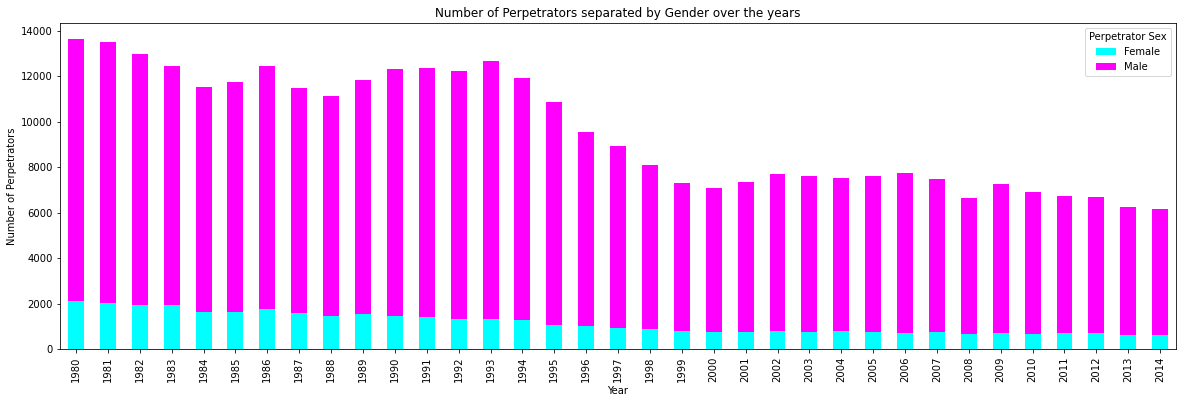

In [35]:
fig, ax = plt.subplots(figsize=(20,6))
group_year_gender.plot(kind = 'bar', stacked=True, ax=ax, colormap='cool')
plt.title('Number of Perpetrators separated by Gender over the years')
plt.xlabel('Year')
plt.ylabel('Number of Perpetrators')
plt.legend(title='Perpetrator Sex')
plt.show();

### Victim Gender over the years

In [36]:
df['Year'] = pd.Categorical(df['Year'])
group_year_gender = df.groupby(['Year', 'Victim Sex']).size().unstack(fill_value = 0)
group_year_gender

Victim Sex  Female   Male
Year                     
1980          3176  10471
1981          3092  10422
1982          3142   9833
1983          3087   9364
1984          3013   8502
1985          3096   8657
1986          3232   9210
1987          3085   8373
1988          3017   8101
1989          2924   8917
1990          2934   9387
1991          2966   9412
1992          3043   9165
1993          3303   9353
1994          2963   8964
1995          2852   8012
1996          2509   7034
1997          2366   6550
1998          2287   5789
1999          2125   5194
2000          2113   4971
2001          2182   5154
2002          2199   5499
2003          2149   5463
2004          2119   5394
2005          2119   5487
2006          2041   5693
2007          2070   5403
2008          2048   4596
2009          2105   5140
2010          1996   4924
2011          1972   4742
2012          1969   4733
2013          1841   4430
2014          1826   4318

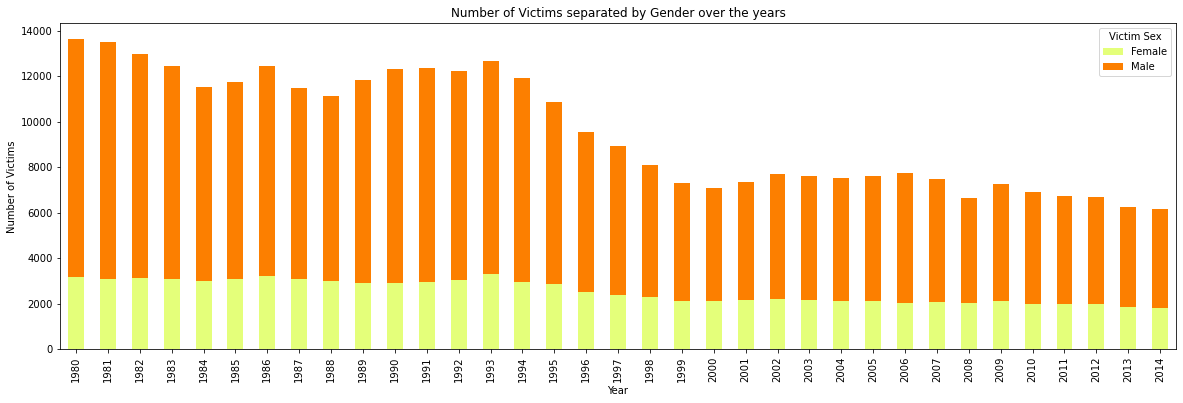

In [37]:
fig, ax = plt.subplots(figsize=(20,6))
group_year_gender.plot(kind = 'bar', stacked=True, ax=ax, colormap='Wistia')
plt.title('Number of Victims separated by Gender over the years')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.legend(title='Victim Sex')
plt.show();

### Month with more homicides over the years

In [38]:
df['Month_Year'] = df['Month'] + ' ' + df['Year'].astype(str)
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%B %Y')

# This counts the incidents of homicide of each month of each year
higher_month = df.groupby(['Year', 'Month']).size().reset_index(name='Number of Homicides')

# idxmax() displays the first result of each month
higher_month_per_year = higher_month.loc[higher_month.groupby('Year')['Number of Homicides'].idxmax()]

# Here I just reseted the index to look better
higher_month_per_year = higher_month_per_year.reset_index(drop=True)

higher_month_per_year

Year     Month  Number of Homicides
0   1980    August                 1398
1   1981      July                 1229
2   1982       May                 1169
3   1983  December                 1165
4   1984  December                 1078
5   1985    August                 1101
6   1986      July                 1198
7   1987       May                 1056
8   1988    August                 1009
9   1989      July                 1096
10  1990      July                 1172
11  1991    August                 1166
12  1992  December                 1316
13  1993    August                 1201
14  1994      July                 1074
15  1995    August                 1030
16  1996    August                  881
17  1997   January                  828
18  1998    August                  720
19  1999      July                  698
20  2000  December                  694
21  2001      July                  682
22  2002    August                  719
23  2003     April                  681
24  2004      July                  705
25  2005      July                  693
26  2006      July                  709
27  2007      July                  722
28  2008      July                  647
29  2009      July                  720
30  2010      July                  620
31  2011       May                  655
32  2012      July                  648
33  2013      July                  607
34  2014    August                  553

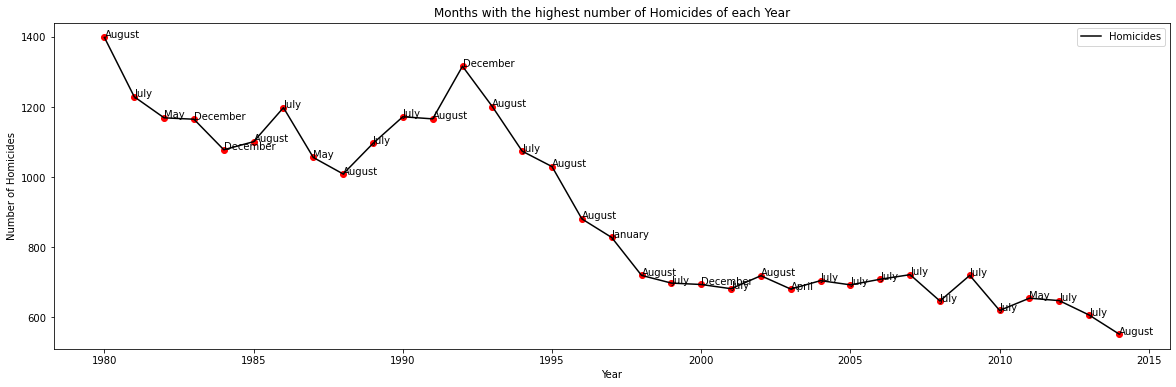

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], linestyle='-', color='black', label='Homicides')
plt.scatter(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], color='red')

# Code to generate notation on each dot
for i, txt in enumerate(higher_month_per_year['Month']):
    plt.annotate(txt, (higher_month_per_year.loc[i, 'Year'], higher_month_per_year.loc[i, 'Number of Homicides']))
    
plt.title('Months with the highest number of Homicides of each Year')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.legend()
plt.show()

### Weapon Variety according to relationship

For this one I decided to create three heatmaps: the first one with the overall picture and the second with the exclusion of some less highlighted Weapons and relationships.

The Third Heatmap excluded the 'Handgun' as a Weapon and the relationships 'Stranger' and 'Acquaintance', so the other ones got more detail.

In [40]:
weapon_counts = df['Weapon'].value_counts()
weapon_counts

Handgun          166238
Knife             62212
Blunt Object      41524
Shotgun           22576
Rifle             16933
Firearm           12604
Strangulation      3835
Fire               3401
Suffocation        2613
Drugs              1177
Drowning            914
Gun                 780
Explosives          333
Poison              331
Fall                147
Name: Weapon, dtype: int64

In [41]:
relationship_counts = df['Relationship'].value_counts()
relationship_counts

Acquaintance            119505
Stranger                 82333
Wife                     22126
Friend                   20742
Girlfriend               15448
Family                    8943
Husband                   8513
Son                       8439
Boyfriend                 7019
Daughter                  6234
Neighbor                  6048
Brother                   5350
Father                    4152
Mother                    3905
In-Law                    3523
Common-Law Wife           2342
Common-Law Husband        1901
Ex-Wife                   1895
Stepfather                1318
Sister                    1233
Boyfriend/Girlfriend      1218
Stepson                   1113
Stepdaughter               697
Ex-Husband                 599
Employer                   477
Employee                   344
Stepmother                 201
Name: Relationship, dtype: int64

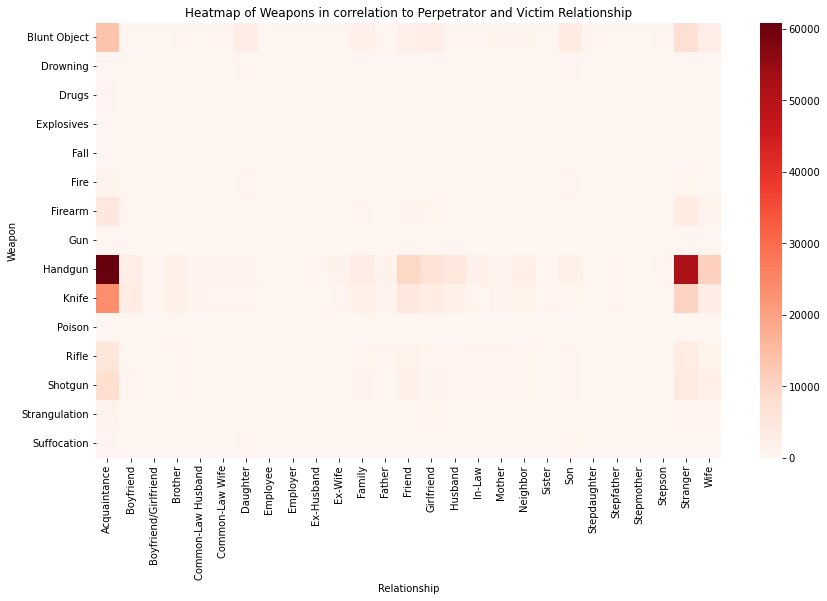

In [42]:
cross_tab = pd.crosstab(df['Weapon'], df['Relationship'])
plt.figure(figsize=(14,8))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

By Observing and running each time a new exclusion was mayde, I made this graph more heated by excluding categories that did not represent many of the occurrences

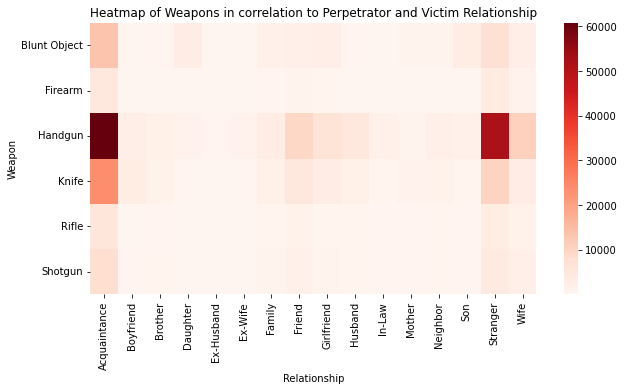

In [43]:
filtered_df = df[(df['Weapon'] != 'Drowning') & (df['Weapon'] != 'Drugs') & (df['Weapon'] != 'Explosives')
                 & (df['Weapon'] != 'Strangulation') & (df['Weapon'] != 'Suffocation') & (df['Weapon'] != 'Gun')
                 & (df['Weapon'] != 'Poison') & (df['Weapon'] != 'Fall') & (df['Weapon'] != 'Fire') 
                 & (df['Relationship'] != 'Boyfriend/Girlfriend') & (df['Relationship'] != 'Common-Law Husband')
                & (df['Relationship'] != 'Stepfather') & (df['Relationship'] != 'Stepmother') 
                 & (df['Relationship'] != 'Employee') & (df['Relationship'] != 'Employer')
                & (df['Relationship'] != 'Father') & (df['Relationship'] != 'Sister')
                & (df['Relationship'] != 'Stepdaughter') & (df['Relationship'] != 'Stepson')
                & (df['Relationship'] != 'Common-Law Wife')]

cross_tab = pd.crosstab(filtered_df['Weapon'], filtered_df['Relationship'])
plt.figure(figsize=(10,5))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

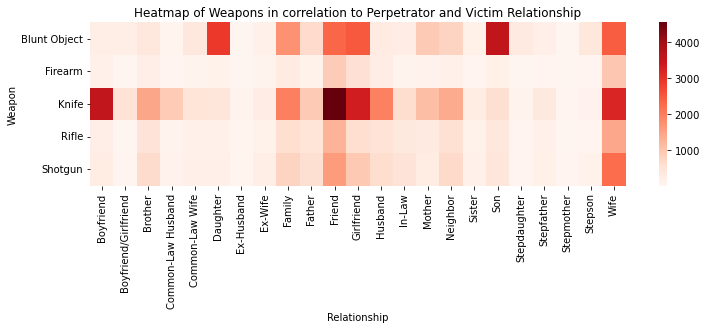

In [44]:
filtered_df = df[(df['Weapon'] != 'Handgun') & (df['Relationship'] != 'Stranger') & (df['Relationship'] != 'Acquaintance')
                 & (df['Relationship'] != 'Employee') & (df['Relationship'] != 'Employer') & (df['Weapon'] != 'Drowning') 
                 & (df['Weapon'] != 'Drugs') & (df['Weapon'] != 'Explosives')
                 & (df['Weapon'] != 'Strangulation') & (df['Weapon'] != 'Suffocation') & (df['Weapon'] != 'Gun')
                 & (df['Weapon'] != 'Poison') & (df['Weapon'] != 'Fall') & (df['Weapon'] != 'Fire')]

cross_tab = pd.crosstab(filtered_df['Weapon'], filtered_df['Relationship'])
plt.figure(figsize=(12,3))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

### Weapon percentage 

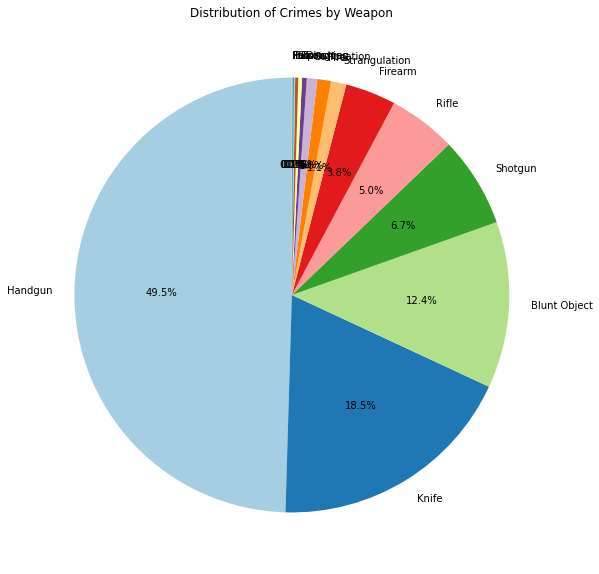

In [45]:
data = df['Weapon'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Crimes by Weapon')
plt.show()

There is not much difference, just that stranger became the second most 'popular' category of relationships.

___________________________________

# e) Data Exploratory Analysis 

What are the Variations and Covariations between features?

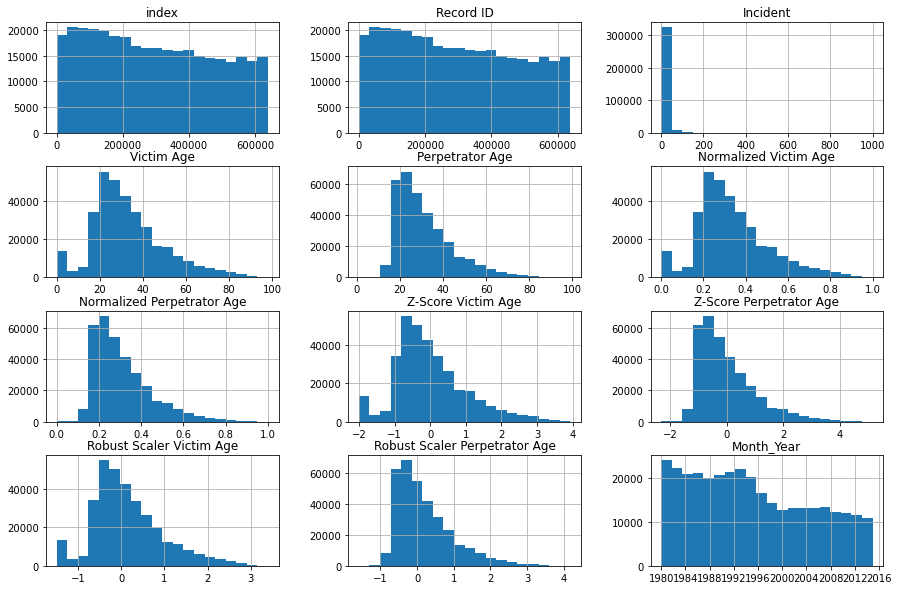

In [46]:
df.hist(bins=20, figsize=(15,10))
plt.show()

Text(0.5, 1.02, 'Histograms for Victim Age related numbers')

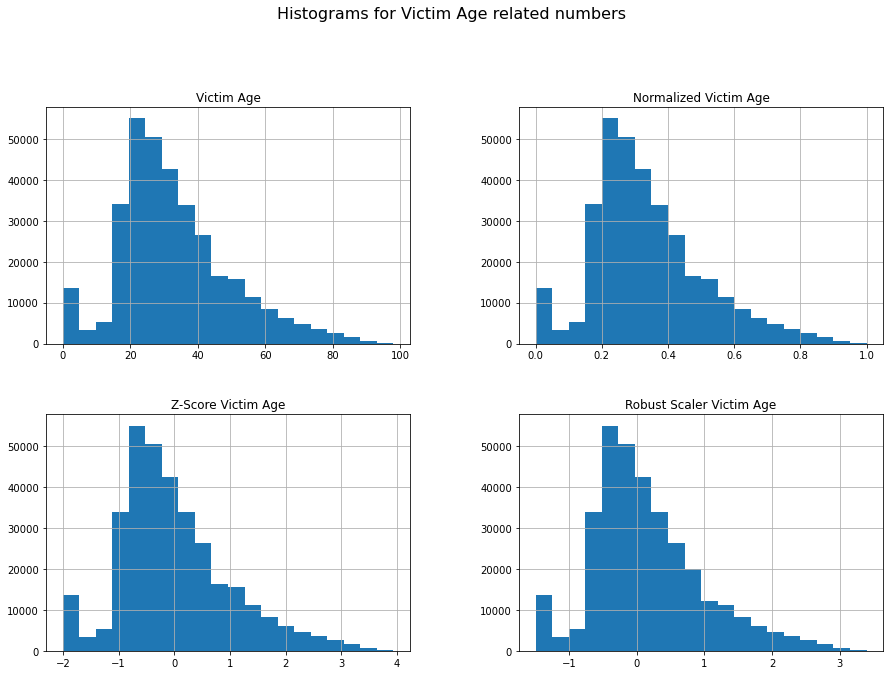

In [47]:
v_columns = ['Victim Age', 'Normalized Victim Age', 'Z-Score Victim Age', 'Robust Scaler Victim Age']

df[v_columns].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms for Victim Age related numbers', y=1.02, size=16)

Text(0.5, 1.02, 'Histograms for Perpetrator Age related numbers')

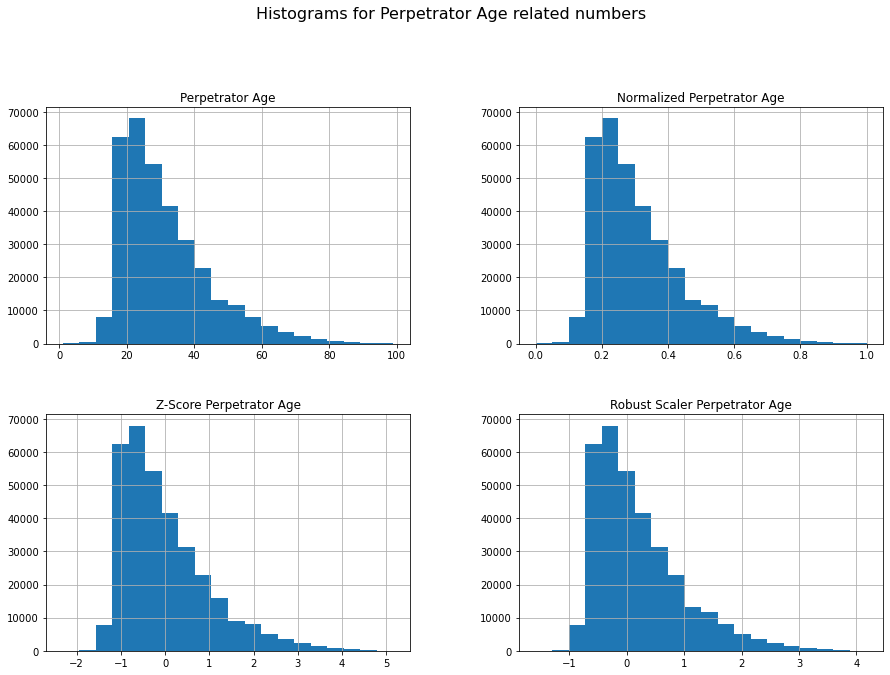

In [48]:
p_columns = ['Perpetrator Age', 'Normalized Perpetrator Age', 'Z-Score Perpetrator Age', 'Robust Scaler Perpetrator Age']

df[p_columns].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms for Perpetrator Age related numbers', y=1.02, size=16)

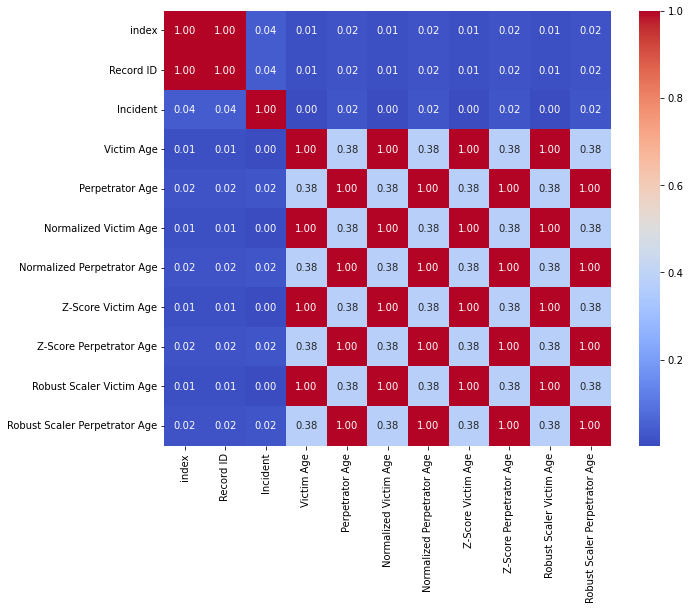

In [49]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [50]:
covariance_matrix = df.cov()
covariance_matrix

index     Record ID       Incident  \
index                          3.382008e+10  3.382008e+10  327895.431331   
Record ID                      3.382008e+10  3.382008e+10  327895.431331   
Incident                       3.278954e+05  3.278954e+05    2164.018254   
Victim Age                     3.487474e+04  3.487474e+04       2.223572   
Perpetrator Age                4.999741e+04  4.999741e+04      13.761614   
Normalized Victim Age          3.558647e+02  3.558647e+02       0.022690   
Normalized Perpetrator Age     5.101777e+02  5.101777e+02       0.140425   
Z-Score Victim Age             2.114998e+03  2.114998e+03       0.134850   
Z-Score Perpetrator Age        3.817572e+03  3.817572e+03       1.050773   
Robust Scaler Victim Age       1.743737e+03  1.743737e+03       0.111179   
Robust Scaler Perpetrator Age  2.941024e+03  2.941024e+03       0.809507   

                                 Victim Age  Perpetrator Age  \
index                          34874.740230     49997.413571   
Record ID                      34874.740230     49997.413571   
Incident                           2.223572        13.761614   
Victim Age                       271.896439        81.221471   
Perpetrator Age                   81.221471       171.522788   
Normalized Victim Age              2.774453         0.828791   
Normalized Perpetrator Age         0.828791         1.750233   
Z-Score Victim Age                16.489307         4.925720   
Z-Score Perpetrator Age            6.201698        13.096690   
Robust Scaler Victim Age          13.594822         4.061074   
Robust Scaler Perpetrator Age      4.777734        10.089576   

                               Normalized Victim Age  \
index                                     355.864696   
Record ID                                 355.864696   
Incident                                    0.022690   
Victim Age                                  2.774453   
Perpetrator Age                             0.828791   
Normalized Victim Age                       0.028311   
Normalized Perpetrator Age                  0.008457   
Z-Score Victim Age                          0.168258   
Z-Score Perpetrator Age                     0.063283   
Robust Scaler Victim Age                    0.138723   
Robust Scaler Perpetrator Age               0.048752   

                               Normalized Perpetrator Age  Z-Score Victim Age  \
index                                          510.177689         2114.997550   
Record ID                                      510.177689         2114.997550   
Incident                                         0.140425            0.134850   
Victim Age                                       0.828791           16.489307   
Perpetrator Age                                  1.750233            4.925720   
Normalized Victim Age                            0.008457            0.168258   
Normalized Perpetrator Age                       0.017860            0.050262   
Z-Score Victim Age                               0.050262            1.000003   
Z-Score Perpetrator Age                          0.133640            0.376105   
Robust Scaler Victim Age                         0.041440            0.824465   
Robust Scaler Perpetrator Age                    0.102955            0.289748   

                               Z-Score Perpetrator Age  \
index                                      3817.572312   
Record ID                                  3817.572312   
Incident                                      1.050773   
Victim Age                                    6.201698   
Perpetrator Age                              13.096690   
Normalized Victim Age                         0.063283   
Normalized Perpetrator Age                    0.133640   
Z-Score Victim Age                            0.376105   
Z-Score Perpetrator Age                       1.000003   
Robust Scaler Victim Age                      0.310085   
Robust Scaler Perpetrator Age                 0.770394   

             

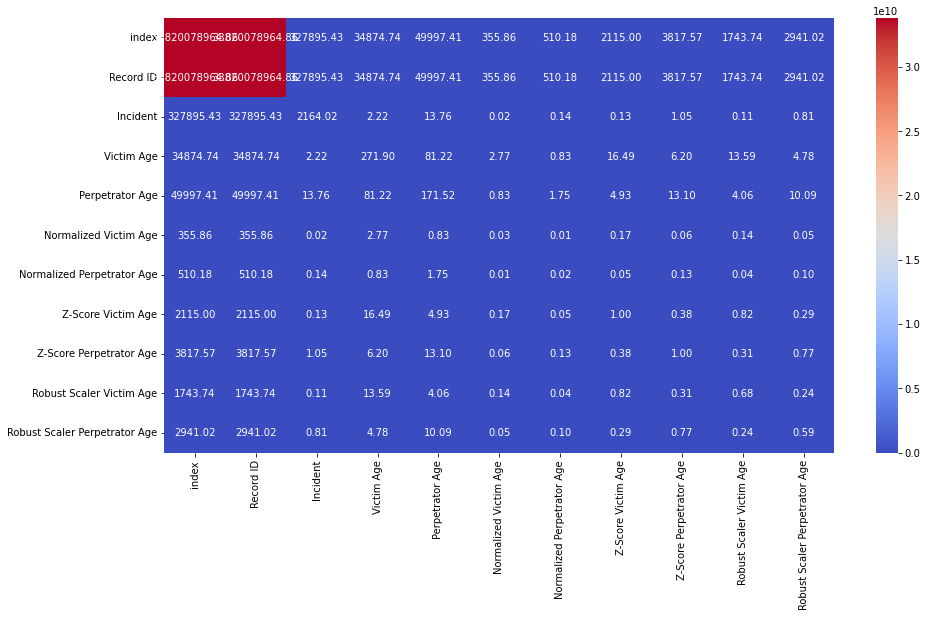

In [51]:
plt.figure(figsize=(15, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

____________________________

# f) Dummy Coding

Here we will do Dummy Encoding to the categorical data so we can use them in the PCA in the next task.

For the sake of ths activity I chose these columns: 'Crime Type', 'Victim Sex' and 'Perpetrator Sex'.

In [101]:
df_encoded = pd.get_dummies(df, columns=['Crime Type', 'Victim Sex', 'Perpetrator Sex', 'Weapon'], 
                            prefix= ['Crime Type', 'Victim Sex', 'Perpetrator Sex', 'Weapon'])
pd.set_option('display.max_columns', None)
df_encoded.head()

index  Record ID       City   State  Year    Month  Incident Crime Solved  \
0      0          1  Anchorage  Alaska  1980  January         1          Yes   
1      1          2  Anchorage  Alaska  1980    March         1          Yes   
2      3          4  Anchorage  Alaska  1980    April         1          Yes   
3      5          6  Anchorage  Alaska  1980      May         1          Yes   
4      6          7  Anchorage  Alaska  1980      May         2          Yes   

   Victim Age                    Victim Race  Perpetrator Age  \
0          14  Native American/Alaska Native               15   
1          43                          White               42   
2          43                          White               42   
3          30                          White               36   
4          42  Native American/Alaska Native               27   

                Perpetrator Race  Relationship  Normalized Victim Age  \
0  Native American/Alaska Native  Acquaintance               0.142857   
1                          White  Acquaintance               0.438776   
2                          White  Acquaintance               0.438776   
3                          White  Acquaintance               0.306122   
4                          Black          Wife               0.428571   

   Normalized Perpetrator Age  Z-Score Victim Age  Z-Score Perpetrator Age  \
0                    0.142857           -1.158413                -1.248871   
1                    0.418367            0.600308                 0.812725   
2                    0.418367            0.600308                 0.812725   
3                    0.357143           -0.188084                 0.354593   
4                    0.265306            0.539662                -0.332606   

   Robust Scaler Victim Age  Robust Scaler Perpetrator Age Month_Year  \
0                     -0.80                      -0.764706 1980-01-01   
1                      0.65                       0.823529 1980-03-01   
2                      0.65                       0.823529 1980-04-01   
3                      0.00                       0.470588 1980-05-01   
4                      0.60                      -0.058824 1980-05-01   

   Crime Type_Manslaughter by Negligence  Crime Type_Murder or Manslaughter  \
0                                      0                                  1   
1                                      0                                  1   
2                                      0                                  1   
3                                      0                                  1   
4                                      0                                  1   

   Victim Sex_Female  Victim Sex_Male  Perpetrator Sex_Female  \
0                  0                1                       0   
1                  0                1                       0   
2                  0                1                       0   
3                  0                1                       0   
4                  1                0                       0   

   Perpetrator Sex_Male  Weapon_Blunt Object  Weapon_Drowning  Weapon_Drugs  \
0                     1                    1                0             0   
1                     1                    0                0             0   
2                     1                    0                0             0   
3                     1                    0                0             0   
4                     1                    0                0             0   

   Weapon_Explosives  Weapon_Fall  Weapon_Fire  Weapon_Firearm  Weapon_Gun  \
0                  0            0            0               0           0   
1                  0            0            0               0           0   
2                  0            0            0               0           0   
3                  0            0            0               0           0   
4                  0            0            0       

In [102]:
df_encoded.dtypes

index                                             int64
Record ID                                         int64
City                                             object
State                                            object
Year                                           category
Month                                            object
Incident                                          int64
Crime Solved                                     object
Victim Age                                        int64
Victim Race                                      object
Perpetrator Age                                   int64
Perpetrator Race                                 object
Relationship                                     object
Normalized Victim Age                           float64
Normalized Perpetrator Age                      float64
Z-Score Victim Age                              float64
Z-Score Perpetrator Age                         float64
Robust Scaler Victim Age                        

Here is the correlation matrix heatmap for the values on the df_encoded, that include the dummy values.

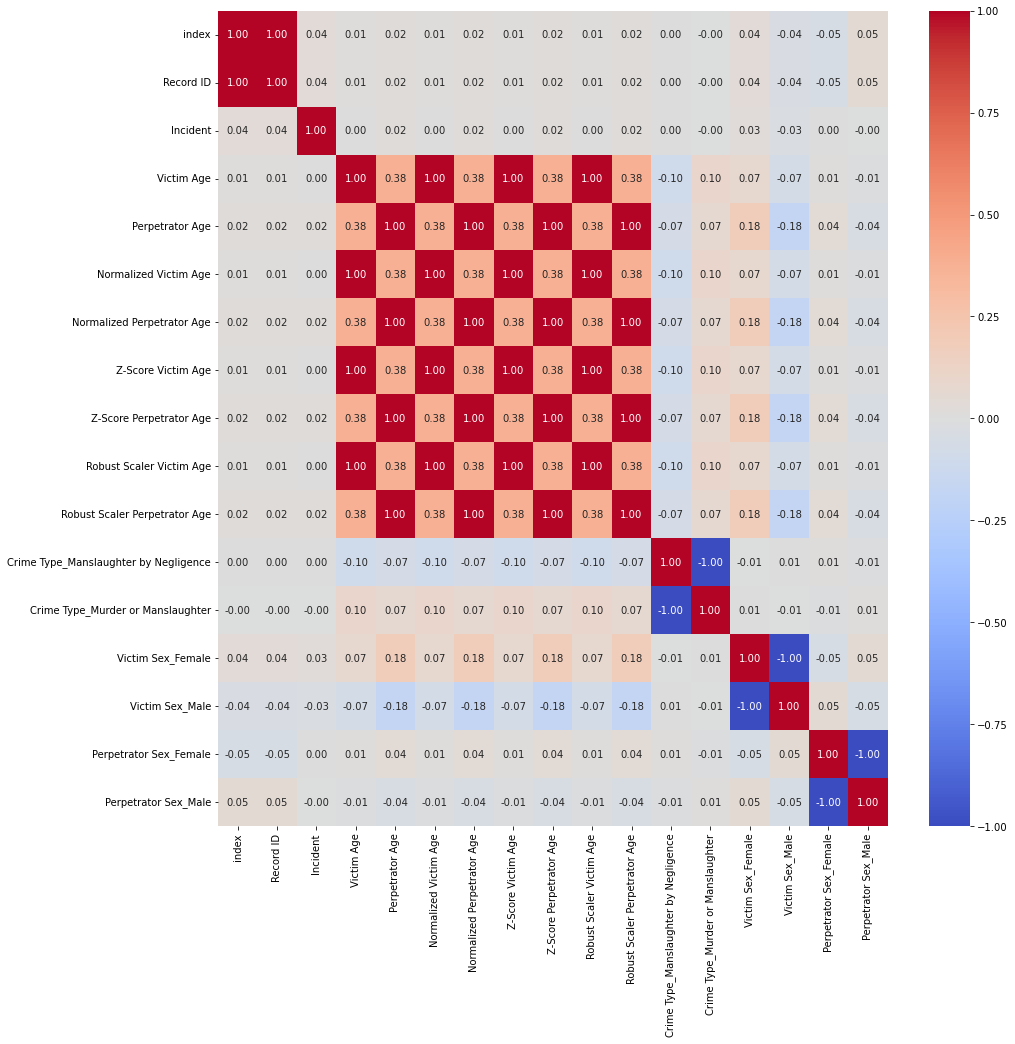

In [54]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

__________________

# g) Principal Component Analysis

In [67]:
df_encoded

index  Record ID        City    State  Year      Month  Incident  \
0            0          1   Anchorage   Alaska  1980    January         1   
1            1          2   Anchorage   Alaska  1980      March         1   
2            3          4   Anchorage   Alaska  1980      April         1   
3            5          6   Anchorage   Alaska  1980        May         1   
4            6          7   Anchorage   Alaska  1980        May         2   
...        ...        ...         ...      ...   ...        ...       ...   
335613  638448     638449     Natrona  Wyoming  2014     August         1   
335614  638450     638451    Sheridan  Wyoming  2014       June         1   
335615  638451     638452    Sheridan  Wyoming  2014  September         1   
335616  638452     638453    Sublette  Wyoming  2014   December         1   
335617  638453     638454  Sweetwater  Wyoming  2014  September         1   

       Crime Solved  Victim Age                    Victim Race  \
0               Yes          14  Native American/Alaska Native   
1               Yes          43                          White   
2               Yes          43                          White   
3               Yes          30                          White   
4               Yes          42  Native American/Alaska Native   
...             ...         ...                            ...   
335613          Yes          29  Native American/Alaska Native   
335614          Yes          62                          White   
335615          Yes           0         Asian/Pacific Islander   
335616          Yes          55                          White   
335617          Yes           0                          White   

        Perpetrator Age               Perpetrator Race  Relationship  \
0                    15  Native American/Alaska Native  Acquaintance   
1                    42                          White  Acquaintance   
2                    42                          White  Acquaintance   
3                    36                          White  Acquaintance   
4                    27                          Black          Wife   
...                 ...                            ...           ...   
335613               67                          Black        Friend   
335614               57                          White  Acquaintance   
335615               22         Asian/Pacific Islander      Daughter   
335616               31                          White      Stranger   
335617               24                          White      Daughter   

        Normalized Victim Age  Normalized Perpetrator Age  Z-Score Victim Age  \
0                    0.142857                    0.142857           -1.158413   
1                    0.438776                    0.418367            0.600308   
2                    0.438776                    0.418367            0.600308   
3                    0.306122                    0.357143           -0.188084   
4                    0.428571                    0.265306            0.539662   
...                       ...                         ...                 ...   
335613               0.295918                    0.673469           -0.248730   
335614               0.632653                    0.571429            1.752573   
335615               0.000000                    0.214286           -2.007451   
335616               0.561224                    0.306122            1.328054   
335617               0.000000                    0.234694           -2.007451   

        Z-Score Perpetrator Age  Robust Scaler Victim Age  \
0                     -1.248871                     -0.80   
1                      0.812725                      0.65   
2                      0.812725                      0.65   
3                      0.354593                      0.00   
4                     -0.332606                      0.60   
...                         ...                       ...   
335613                 2.7

In [69]:
# Columns that wil be included in a subdf that only include numerical values
numerical_columns = ['Normalized Victim Age', 'Normalized Perpetrator Age','Perpetrator Sex_Female', 
                     'Perpetrator Sex_Male', 'Crime Type_Manslaughter by Negligence', 'Crime Type_Murder or Manslaughter', 
                     'Weapon_Drowning', 'Weapon_Drugs', 'Weapon_Explosives', 'Weapon_Fall', 'Weapon_Fire',
                'Weapon_Firearm', 'Weapon_Gun', 'Weapon_Handgun', 'Weapon_Knife', 'Weapon_Poison',
                'Weapon_Rifle', 'Weapon_Shotgun', 'Weapon_Strangulation', 'Weapon_Suffocation']

df_encoded_numerical = df_encoded[numerical_columns].copy().reset_index()

df_encoded_numerical

index  Normalized Victim Age  Normalized Perpetrator Age  \
0            0               0.142857                    0.142857   
1            1               0.438776                    0.418367   
2            2               0.438776                    0.418367   
3            3               0.306122                    0.357143   
4            4               0.428571                    0.265306   
...        ...                    ...                         ...   
335613  335613               0.295918                    0.673469   
335614  335614               0.632653                    0.571429   
335615  335615               0.000000                    0.214286   
335616  335616               0.561224                    0.306122   
335617  335617               0.000000                    0.234694   

        Perpetrator Sex_Female  Perpetrator Sex_Male  \
0                            0                     1   
1                            0                     1   
2                            0                     1   
3                            0                     1   
4                            0                     1   
...                        ...                   ...   
335613                       0                     1   
335614                       0                     1   
335615                       1                     0   
335616                       0                     1   
335617                       1                     0   

        Crime Type_Manslaughter by Negligence  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
335613                                      0   
335614                                      0   
335615                                      0   
335616                                      0   
335617                                      0   

        Crime Type_Murder or Manslaughter  Weapon_Drowning  Weapon_Drugs  \
0                                       1                0             0   
1                                       1                0             0   
2                                       1                0             0   
3                                       1                0             0   
4                                       1                0             0   
...                                   ...              ...           ...   
335613                                  1                0             0   
335614                                  1                0             0   
335615                                  1                0             0   
335616                                  1                0             0   
335617                                  1                0             0   

        Weapon_Explosives  Weapon_Fall  Weapon_Fire  Weapon_Firearm  \
0                       0            0            0               0   
1                       0            0            0               0   
2                       0            0            0               0   
3                       0            0            0               0   
4                       0            0            0               0   
...                   ...          ...          ...             ...   
335613                  0            0            0               1   
335614                  0            0            0               0   
335615                  0            0            0               0   
335616                  0            0            0               0   
335617                  0            0            0               0   

        Weapon_Gun  Weapon_Handgun  Weapon_Knife  Weapon_Poison  Weapon_Rifle  \
0                0               0             0              0        

In [110]:
# Here I am sampling data, not using all values from it
# subset_size= 300000
# df_encoded_numerical_subset = df_encoded_numerical.sample(n=subset_size, random_state=42)

# This is the standardization of all data by the use of the Standard Scaler
scaler= StandardScaler()
scaler.fit(df_encoded_numerical)
scaled_data = scaler.transform(df_encoded_numerical)

scaled_data

array([[-1.73204565, -1.15841302, -1.24887068, ..., -0.26854817,
        -0.10751167, -0.08858176],
       [-1.73203533,  0.60030772,  0.81272502, ..., -0.26854817,
         9.3013156 , -0.08858176],
       [-1.732025  ,  0.60030772,  0.81272502, ..., -0.26854817,
         9.3013156 , -0.08858176],
       ...,
       [ 1.732025  , -2.00745062, -0.7143829 , ..., -0.26854817,
        -0.10751167, 11.28900518],
       [ 1.73203533,  1.32805423, -0.02718434, ..., -0.26854817,
        -0.10751167, -0.08858176],
       [ 1.73204565, -2.00745062, -0.56167211, ..., -0.26854817,
        -0.10751167, -0.08858176]])

In [111]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)

In [112]:
scaled_data.shape

(335618, 21)

In [113]:
x_pca.shape

(335618, 2)

Text(0, 0.5, 'Principal Component 2')

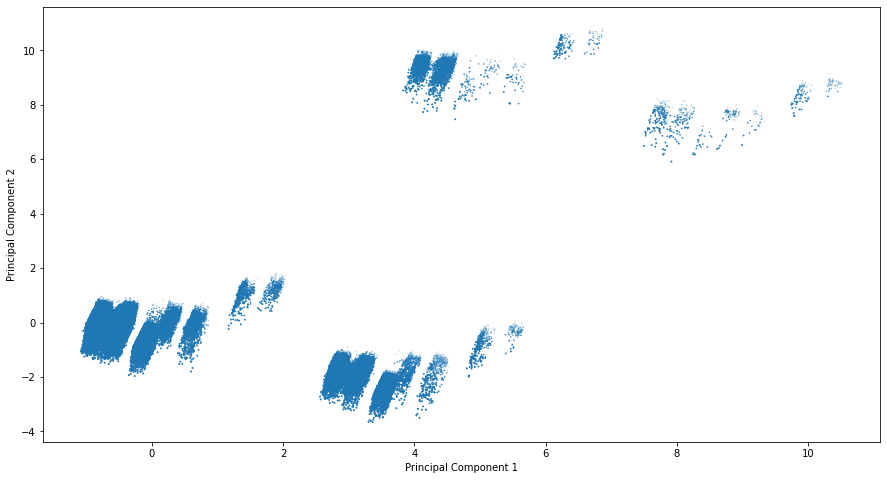

In [115]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], df_encoded_numerical['Normalized Victim Age'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

_______________________

# h) Dimensionality Reduction: Purpose and Benefits

Dimensionality reduction is a way of grouping and visualising data in an easier/ simpler way, in 2 or 3 dimensions. Because the amount of variables that are numerical can escalate in X amount of features, is necessary to group and divide them in less dimensions so it can helps us understand the distribution of data points for each Principal Component. 

The benefits that can be obtained from that is that :

- You can actually observe data trends and variations in a 2D scatter plot, biplot, 3d scatter plots, heatmaps, pairplots etc.
- Less space is needed when storing data.
- Using samples can also help with storage size.
- It removes redundant information, making everything slimmer.
- Helps with computational time.

